In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [50]:
df = pd.read_csv('../Data/dataset.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,2578,B,Road,3,1,175,2,low,M,42,1668,1
1,2894,F,Flight,4,1,226,3,low,M,42,3077,1
2,1928,F,Flight,5,2,151,3,medium,M,20,1395,1
3,10869,A,Ship,4,4,219,3,medium,M,10,4947,0
4,7019,C,Ship,6,1,206,6,medium,F,8,4243,1


In [51]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

### Renaming Target class and removing ID col

In [52]:
df.rename(columns = {'Reached.on.Time_Y.N' : 'Reached'}, inplace = True)
df = df.drop('ID', axis = 1)

In [53]:
for column in df.columns:
    print('='*20)
    print(column, " : ")
    print(df[column].unique())

Warehouse_block  : 
['B' 'F' 'A' 'C' 'D']
Mode_of_Shipment  : 
['Road' 'Flight' 'Ship']
Customer_care_calls  : 
[3 4 5 6 2 7]
Customer_rating  : 
[1 2 4 5 3]
Cost_of_the_Product  : 
[175 226 151 219 206 191 204 135 192 246 266 165 154 181 243 234 157 186
 171 276 237 119 207 129 284 216 174 229 222 123 142 259 170 268 242 185
 169 304 287 212 161 149 238 217 225 145 223 148 275 224 262 310 150 256
 137 167 187 244 172 214 271 152 166 267 247 141 289  98 140 127 261 221
 211 182 197 251 257 296 201 265 156 294 231 163 143 240 286 114 248 235
 146 111 232 260 252 227 139 264 160 236 269 134 218 162 278 245 249 210
 280 254 272 263 279 200 164 153 305 205 138 239 194 147 255 203 274 158
 195 220 188 176 107 173 303 178 301 258 190 131 108 168 253 180 273 283
 241 136 213 184 228 144 202 133 198 233 298 306 250 282 270 196 295 179
 177 155 309 103 189 293 106 128 209 208 183 193 297 118 159 215 230 290
 308 102 109 199 125 292 126 281 132  99 285 100 277 121 130 291 101 110
 115 112 117 30

In [54]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached
0,B,Road,3,1,175,2,low,M,42,1668,1
1,F,Flight,4,1,226,3,low,M,42,3077,1
2,F,Flight,5,2,151,3,medium,M,20,1395,1
3,A,Ship,4,4,219,3,medium,M,10,4947,0
4,C,Ship,6,1,206,6,medium,F,8,4243,1


### Warehouse Block

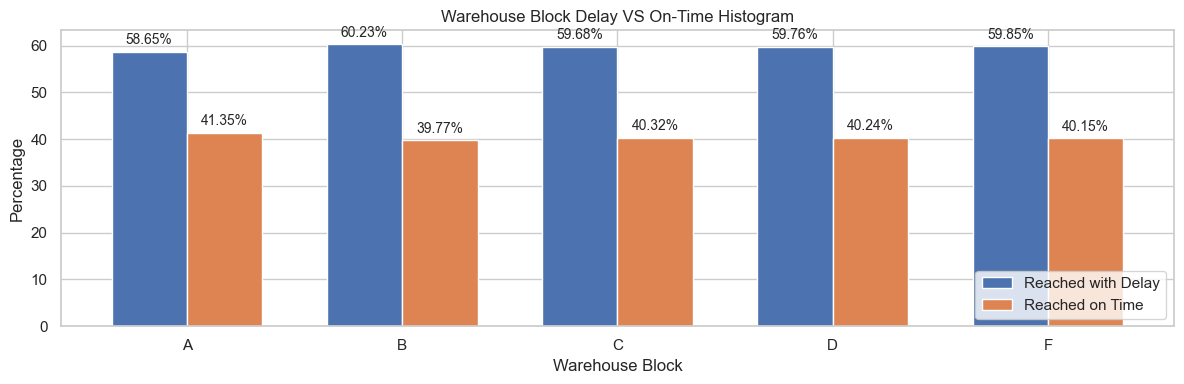

In [63]:
temp = df.groupby('Warehouse_block')['Reached'].value_counts().reset_index()
temp1 = temp.groupby('Warehouse_block')['count'].sum().reset_index()
temp1 = temp1.rename(columns = {'count' : 'Sum'})
temp = temp.merge(temp1, on = 'Warehouse_block', how = 'outer',copy = True)
temp['Percent'] = (temp['count'] * 100 )/ (temp['Sum'])
temp

reach_1 = temp[temp['Reached'] == 1]['Percent'].tolist()
reach_2 = temp[temp['Reached'] == 0]['Percent'].tolist()

bar_width = 0.35
x = range(len(reach_1))
fig, ax = plt.subplots(figsize=(12, 4))

# Create bars for "Reached 1"
bar1 = ax.bar(x, reach_1, width=bar_width, label='Reached with Delay')
bar2 = ax.bar([i + bar_width for i in x], reach_2, width=bar_width, label='Reached on Time')

# Set labels, title, and x-axis ticks
ax.set_xlabel('Warehouse Block')
ax.set_ylabel('Percentage')
ax.set_title('Warehouse Block Delay VS On-Time Histogram')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(temp['Warehouse_block'].unique())

ax.legend(loc='lower right')

for i in x:
    ax.text(i, reach_1[i] + .1, f'{reach_1[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width, reach_2[i] + .1, f'{reach_2[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### Mode of Shipment

In [64]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached'],
      dtype='object')

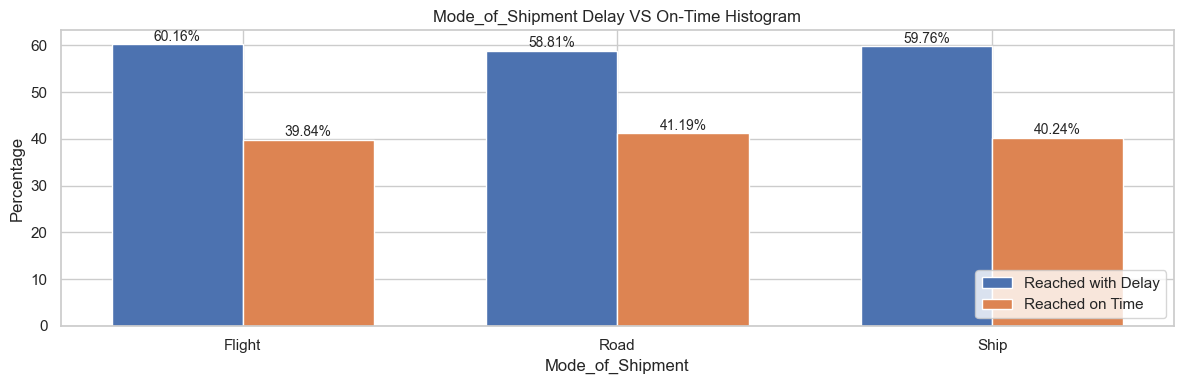

In [67]:
temp = df.groupby('Mode_of_Shipment')['Reached'].value_counts().reset_index()
temp1 = temp.groupby('Mode_of_Shipment')['count'].sum().reset_index()
temp1 = temp1.rename(columns = {'count' : 'Sum'})
temp = temp.merge(temp1, on = 'Mode_of_Shipment', how = 'outer',copy = True)
temp['Percent'] = (temp['count'] * 100 )/ (temp['Sum'])
temp

reach_1 = temp[temp['Reached'] == 1]['Percent'].tolist()
reach_2 = temp[temp['Reached'] == 0]['Percent'].tolist()

bar_width = 0.35
x = range(len(reach_1))
fig, ax = plt.subplots(figsize=(12, 4))

# Create bars for "Reached 1"
bar1 = ax.bar(x, reach_1, width=bar_width, label='Reached with Delay')
bar2 = ax.bar([i + bar_width for i in x], reach_2, width=bar_width, label='Reached on Time')

# Set labels, title, and x-axis ticks
ax.set_xlabel('Mode_of_Shipment')
ax.set_ylabel('Percentage')
ax.set_title('Mode_of_Shipment Delay VS On-Time Histogram')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(temp['Mode_of_Shipment'].unique())

ax.legend(loc='lower right')

for i in x:
    ax.text(i, reach_1[i] + .1, f'{reach_1[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width, reach_2[i] + .1, f'{reach_2[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [70]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached'],
      dtype='object')

In [73]:
pd.pivot_table(df, index = 'Mode_of_Shipment', columns= ['Reached', 'Product_importance'], values = {'Cost_of_the_Product' : 'mean'})

Cost_of_the_Product                                      \
Reached                              0                                   1   
Product_importance                high         low      medium        high   
Mode_of_Shipment                                                             
Flight                      198.220588  215.312500  214.700658  205.673684   
Road                        211.109091  214.475921  217.160883  198.747573   
Ship                        209.617225  217.639646  211.883107  201.818182   

                                            
Reached                                     
Product_importance         low      medium  
Mode_of_Shipment                            
Flight              207.906375  205.375000  
Road                207.581349  208.373832  
Ship                209.344424  206.721028

In [75]:
pd.pivot_table(df, index = 'Mode_of_Shipment', columns= ['Reached', 'Product_importance'], values = {'Weight_in_gms' : 'mean'})

Weight_in_gms                                         \
Reached                        0                                      1   
Product_importance          high          low       medium         high   
Mode_of_Shipment                                                          
Flight               4758.691176  3905.479167  4206.967105  3576.821053   
Road                 4662.309091  4003.875354  4161.570978  3607.203883   
Ship                 4831.760766  4024.039510  4277.015083  3579.107656   

                                              
Reached                                       
Product_importance          low       medium  
Mode_of_Shipment                              
Flight              3288.735060  3271.000000  
Road                3144.319444  3453.077103  
Ship                3119.783505  3332.879392

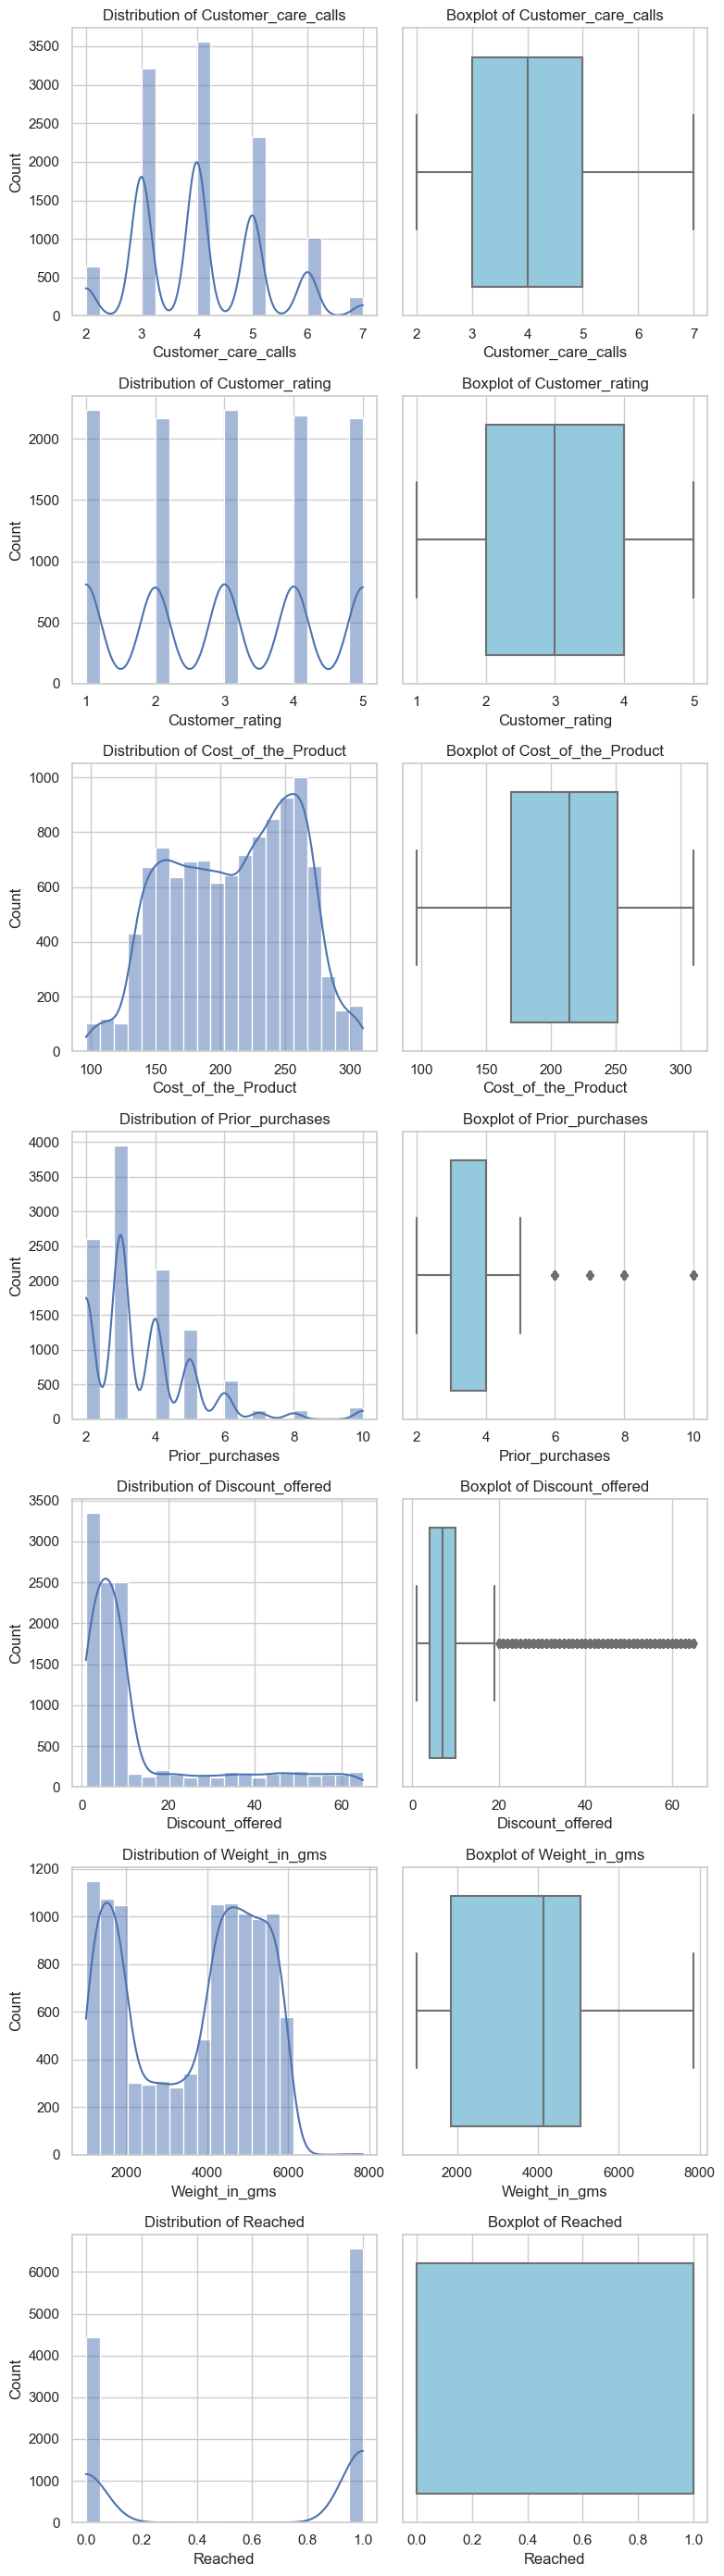

In [12]:
numeric_cols = df.select_dtypes(include=['int', 'float'])

# Define the number of bins for the histogram
num_bins = 20

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), ncols=2, figsize=(8,4* len(numeric_cols.columns)))

for i, col in enumerate(numeric_cols.columns):
    # Distribution plot (histogram)
    ax_hist = axes[i, 0]
    sns.histplot(numeric_cols[col], bins=num_bins, kde=True, ax=ax_hist)
    ax_hist.set_title(f'Distribution of {col}')
    
    # Boxplot
    ax_box = axes[i, 1]
    sns.boxplot(x=numeric_cols[col], ax=ax_box, color='skyblue')
    ax_box.set_title(f'Boxplot of {col}')
    
# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

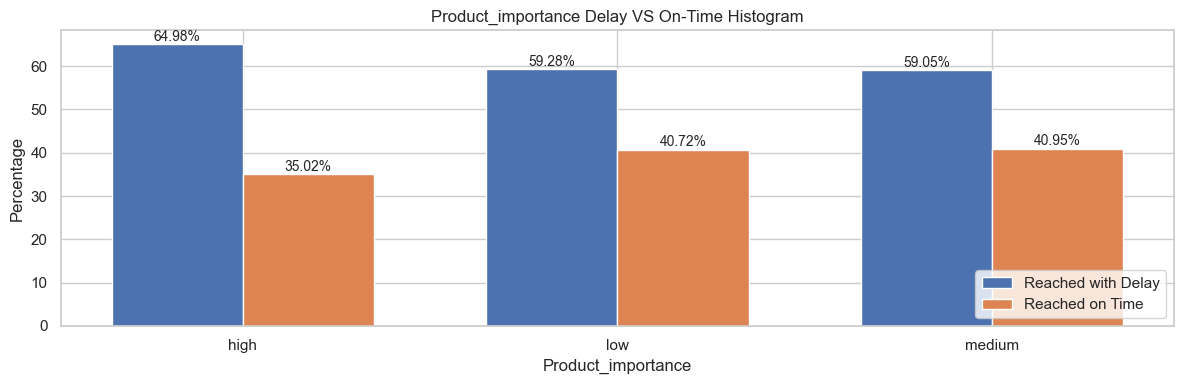

In [68]:
temp = df.groupby('Product_importance')['Reached'].value_counts().reset_index()
temp1 = temp.groupby('Product_importance')['count'].sum().reset_index()
temp1 = temp1.rename(columns = {'count' : 'Sum'})
temp = temp.merge(temp1, on = 'Product_importance', how = 'outer',copy = True)
temp['Percent'] = (temp['count'] * 100 )/ (temp['Sum'])
temp

reach_1 = temp[temp['Reached'] == 1]['Percent'].tolist()
reach_2 = temp[temp['Reached'] == 0]['Percent'].tolist()

bar_width = 0.35
x = range(len(reach_1))
fig, ax = plt.subplots(figsize=(12, 4))

# Create bars for "Reached 1"
bar1 = ax.bar(x, reach_1, width=bar_width, label='Reached with Delay')
bar2 = ax.bar([i + bar_width for i in x], reach_2, width=bar_width, label='Reached on Time')

# Set labels, title, and x-axis ticks
ax.set_xlabel('Product_importance')
ax.set_ylabel('Percentage')
ax.set_title('Product_importance Delay VS On-Time Histogram')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(temp['Product_importance'].unique())

ax.legend(loc='lower right')

for i in x:
    ax.text(i, reach_1[i] + .1, f'{reach_1[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width, reach_2[i] + .1, f'{reach_2[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [46]:
temp = df.groupby('Product_importance')['Reached'].value_counts().reset_index()
temp = temp.pivot_table(index = 'Product_importance', columns = 'Reached', values = 'count').reset_index()
temp['0 Percent'] = round((100 * temp[0])/(temp[0]+temp[1]), 2)
temp['1 Percent'] = round((100 * temp[1])/(temp[0]+temp[1]), 2)
temp

Reached,Product_importance,0,1,0 Percent,1 Percent
0,high,332,616,35.02,64.98
1,low,2157,3140,40.72,59.28
2,medium,1947,2807,40.95,59.05


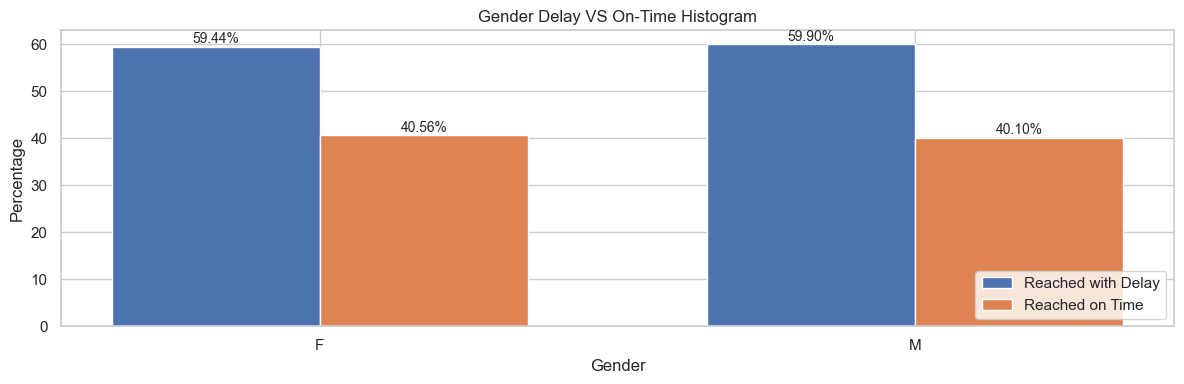

In [69]:
 
temp = df.groupby('Gender')['Reached'].value_counts().reset_index()
temp1 = temp.groupby('Gender')['count'].sum().reset_index()
temp1 = temp1.rename(columns = {'count' : 'Sum'})
temp = temp.merge(temp1, on = 'Gender', how = 'outer',copy = True)
temp['Percent'] = (temp['count'] * 100 )/ (temp['Sum'])
temp

reach_1 = temp[temp['Reached'] == 1]['Percent'].tolist()
reach_2 = temp[temp['Reached'] == 0]['Percent'].tolist()

bar_width = 0.35
x = range(len(reach_1))
fig, ax = plt.subplots(figsize=(12, 4))

# Create bars for "Reached 1"
bar1 = ax.bar(x, reach_1, width=bar_width, label='Reached with Delay')
bar2 = ax.bar([i + bar_width for i in x], reach_2, width=bar_width, label='Reached on Time')

# Set labels, title, and x-axis ticks
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Gender Delay VS On-Time Histogram')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(temp['Gender'].unique())

ax.legend(loc='lower right')

for i in x:
    ax.text(i, reach_1[i] + .1, f'{reach_1[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width, reach_2[i] + .1, f'{reach_2[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()



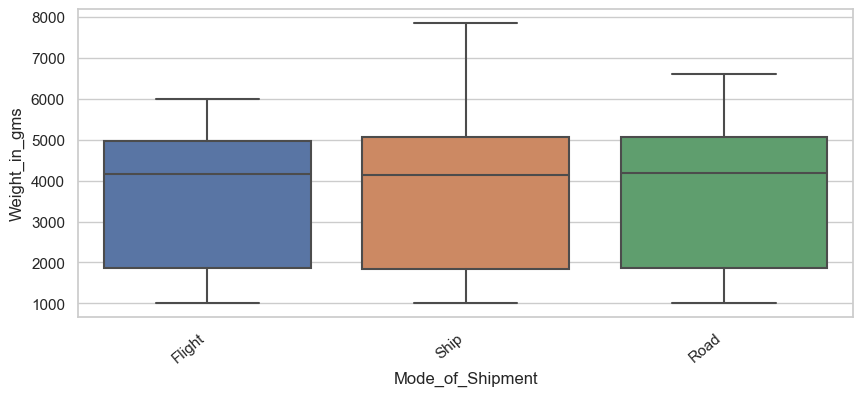

In [53]:
plt.subplots(figsize=(10,4))
ax=sns.boxplot(x='Mode_of_Shipment',y='Weight_in_gms',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

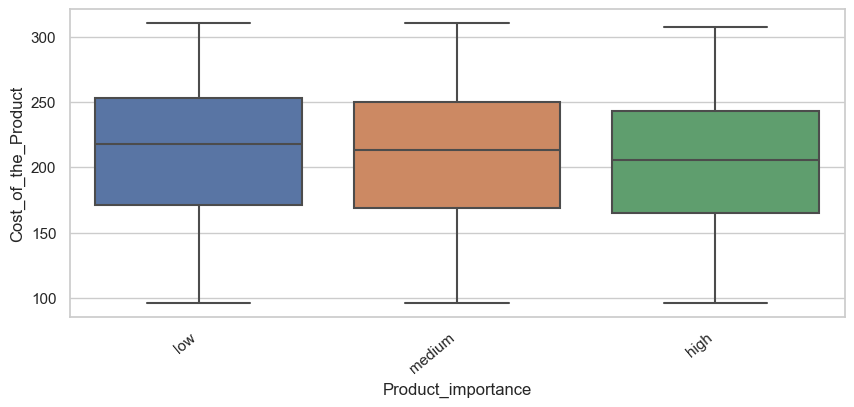

In [56]:
plt.subplots(figsize=(10,4))
ax=sns.boxplot(x='Product_importance',y='Cost_of_the_Product',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()